## Figure 6. Significance of the structural features of the basal segments and UG motif.
- 6A. Distribution of the basal segment lengths.
- 6B. In vitro processing results of pri-miRNAs binned by the basal segment length.
- 6D. In vitro processing results of pri-miRNAs with the UG motif in different structures.
- 6E. In vitro processing results of artificial pri-miRNAs with the UG motif in different structures.
- S5B. Positional frequency of the UG with different structures. 

In [1]:
import time
today = time.strftime('%Y-%m-%d')
name = 'S. Chan Baek'
print 'Last revised by %s at %s.' % (name, today)

Last revised by S. Chan Baek at 2024-01-26.


In [2]:
import os
HOME = '/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep'
SAVEPATH = '%s/%s/'%(HOME,time.strftime('%y%m%d'))
#if not os.path.exists(SAVEPATH):
#    os.makedirs(SAVEPATH)
print SAVEPATH
%cd $HOME

/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep/240126/
/casa/bsc/projects/2_Structure-of-pri/2007_paper_prep


In [3]:
from __future__ import division
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from matplotlib import gridspec, lines, colors
from scipy.stats import pearsonr, mannwhitneyu, sem
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [4]:
s1 = pd.read_csv('publication/TableS1__Pri-miRNAs_selected_for_SHAPE-MaP.csv',index_col=0)
s2 = pd.read_csv('publication/TableS2__Constructs_used_in_this_study.csv',index_col=0)
s3 = pd.read_csv('publication/TableS3_2__SHAPE_reactivity.csv',index_col=0)
s3.columns = range(1,126)
s3cnts = pd.read_csv('publication/TableS3_1__Read_counts.csv',index_col=0)
s3shan = pd.read_csv('publication/TableS3_3__Shannon_entropy.csv',index_col=0)
s3shan.columns = range(1,126)
s3shan = s3shan.fillna(0)
s4str = pd.read_csv('publication/TableS4_1__SHAPE-based_pri-miRNA_structures.csv',index_col=0)
s4str.columns = range(1,126)
s4 = pd.read_csv('publication/TableS4_2__Structural_features_of_pri-miRNAs.csv',index_col=0)
releffs = s4['Cleavage efficiency (MP)']
relhoms = s4['Cleavage homogeneity (MP)']
constseqs = s2['Construct sequence'].to_dict()
folded = list(s4.index)
print len(folded)

476


In [5]:
def get_pre_position(mir):
    constseq = constseqs[mir].replace('T','U')
    preseq = s1.loc[mir, 'Precursor']
    return constseq.find(preseq)+1, constseq.find(preseq)+len(preseq)

def split_ct(ctfile):
    infos = open(ctfile, 'rt').read()
    length = int(infos.split('\n')[0].strip().split()[0])
    rna = infos.split('\n')[0].strip().split()[-1]
    nstrt = infos.count(rna)
    splitinfos = []
    for i in range(nstrt):
        lines = infos.split('\n')[1+(1+length)*i:(1+length)*(i+1)]
        splitinfos.append([ tuple(map(int,l.strip().split()[4:6][::-1])) for l in lines ])
    return splitinfos

### 6A. Distribution of the basal segment lengths.

In [8]:
from matplotlib.colors import LinearSegmentedColormap, ColorConverter
to_rgb = ColorConverter().to_rgb
def custom_cmap(colors, cmap_name="newmap", nspace=3, linear=True):
    if (type(colors) is str) or (len(colors) is 1):
        colors = [colors, "white"]
    ncolors = len(colors)
    sidx = map(int, map(np.around, np.linspace(0, nspace-1, num=ncolors)))
    intervals = np.linspace(0, 1.0, num=nspace)
    rgb = ["red", "green", "blue"]
    cdict = {e:None for e in rgb}
    for element, components in zip(rgb, zip(*[to_rgb(c) for c in colors])):
        intensities = [components[0]]
        for i, value in enumerate(components):
            if i + 1 == len(components): break
            v1, v2 = components[i:i+2]
            intensities += list(np.linspace(v1, v2, num=sidx[i+1] - sidx[i] + 1))[1:]
        cdict[element] =  zip(intervals, intensities, intensities)
    return LinearSegmentedColormap(cmap_name, cdict)

In [9]:
xs = np.arange(8)
data = pd.DataFrame(index=xs,columns=xs).fillna(0)
for m in folded:
    data.loc[min((s4.loc[m,"5' basal segment length (nt)"]+1)//3,max(xs)),
             min((s4.loc[m,"3' basal segment length (nt)"]+1)//3,max(xs))]+=1
    
c='#424242'
red = custom_cmap(['#f0f0f0','#de2d26'])
ys5 = data.T.sum()/len(folded)*100
ys3 = data.sum()/len(folded)*100
labels =  ['0-1','2-4','5-7','8-10','11-13','14-16','17-19','$\geq$20']

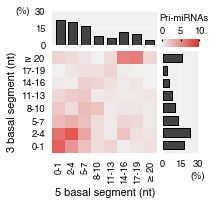

In [10]:
fig = plt.figure(figsize=(2.6,2.6))
gs = gridspec.GridSpec(2, 2, width_ratios=(3,1), height_ratios=(1,3))
ax1 = fig.add_subplot(gs[0]); ax2 = fig.add_subplot(gs[2]); ax3 = fig.add_subplot(gs[3])
fig.subplots_adjust(wspace=.08, hspace=.08)

ax1.bar(xs,ys5,color=c,lw=1,edgecolor='k',width=.7,zorder=2)
ax3.barh(xs,ys3,color=c,lw=1,edgecolor='k',height=.7,zorder=2)
im = ax2.pcolor(data.T/len(folded)*100,cmap=red,vmin=0,vmax=10)

axcb = fig.add_axes([0.71, 0.69, 0.2, 0.04])
cb = plt.colorbar(im, cax=axcb, orientation='horizontal')
axcb.xaxis.set_ticks_position('top')
cb.set_ticks([0,5,10]); cb.set_ticklabels([0,5,10])
axcb.tick_params(direction='in',length=2,labelsize=9.4)
cb.outline.set_linewidth(0); cb.solids.set_rasterized(True)
axcb.text(-.08,3.5,'Pri-miRNAs',fontsize=9.4)

ax2.set_xticks(np.arange(len(labels))+.5); ax2.set_yticks(np.arange(len(labels))+.5)
ax2.set_xticklabels(labels,rotation=90); ax2.set_yticklabels(labels)
ax1.set_xticks([]); ax3.set_yticks([])

for ax in [ax1,ax3]:
    ax.set_facecolor('#f0f0f0')
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(left='off',bottom='off',labelsize=9.4)

ax1.yaxis.grid(ls='-',lw=1,color='w'); ax3.xaxis.grid(ls='-',lw=1,color='w')
ax1.set_xlim(-.6,len(labels)-.4); ax3.set_ylim(-.6,len(labels)-.4)
ax1.set_yticks([0,15,30]); ax3.set_xticks([0,15,30])
ax1.text(-3.5,30,'(%)',va='center',fontsize=9.4)
ax3.text(30,-2.7,'(%)',ha='center',fontsize=9.4)

ax2.set_xlabel('5 basal segment (nt)')
ax2.set_ylabel('3 basal segment (nt)')
ax2.spines['left'].set_visible(False); ax2.spines['bottom'].set_visible(False)
ax2.tick_params(left='off',bottom='off',labelsize=9.4)
#fig.savefig(resultpath + '220530_f5a__basal_segment.pdf')

### 6B. In vitro processing results of pri-miRNAs binned by the basal segment length.

In [17]:
bins = [(0,1),(2,4),(5,7),(8,10),(11,19),(20,50)]
msl = [[m for m in folded if lb<=s4.loc[m,"5' basal segment length (nt)"]<=ub] for lb,ub in bins]
pes = [[releffs[m] for m in ms] for ms in msl]
phs = [[relhoms[m] for m in ms] for ms in msl]
xs1 = np.arange(len(bins))
ys11 = map(np.average,pes)
es11 = map(sem,pes)
ys12 = map(np.average,phs)
es12 = map(sem,phs)
labels1 = ['0-1','2-4','5-7','8-10','11-19',' >=20']
labels1 = ['%s\n(%s)'%(l,len(pe)) for l,pe in zip(labels1,pes)]
print mannwhitneyu(pes[0]+pes[1]+pes[2]+pes[3]+pes[4],pes[5])[1]*2
print mannwhitneyu(phs[0]+phs[1]+phs[2]+phs[3]+phs[4],phs[5])[1]*2

bins = [(0,1),(2,4),(5,7),(8,10),(11,19),(20,50)]
msl = [[m for m in folded if lb<=s4.loc[m,"3' basal segment length (nt)"]<=ub] for lb,ub in bins]
pes = [[releffs[m] for m in ms] for ms in msl]
phs = [[relhoms[m] for m in ms] for ms in msl]
xs2 = np.arange(len(bins))
ys21 = map(np.average,pes)
es21 = map(sem,pes)
ys22 = map(np.average,phs)
es22 = map(sem,phs)
#labels2 = ['0-2','3-5','6-8','9-11',' $\geq$12']
labels2 = ['0-1','2-4','5-7','8-10','11-19',' >=20']
labels2 = ['%s\n(%s)'%(l,len(pe)) for l,pe in zip(labels2,pes)]
print mannwhitneyu(pes[0]+pes[1],pes[2]+pes[3]+pes[4]+pes[5])[1]*2
print mannwhitneyu(phs[0]+phs[1],phs[2]+phs[3]+phs[4]+phs[5])[1]*2

0.012044008013955358
0.007701927309342966
0.008714444116206307
0.018152800804290117


In [18]:
xsl = [xs1,xs2]
ysl1 = [ys11,ys21]
ysl2 = [ys12,ys22]
esl1 = [es11,es21]
esl2 = [es12,es22]
labell = [labels1,labels2]
xlabels = ['5 basal segment (nt)','3 basal segment (nt)']

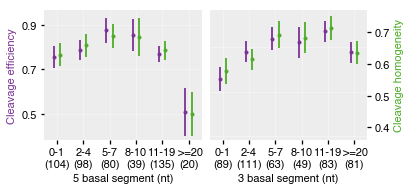

In [24]:
fig = plt.figure(figsize=(5.8,2.4))
gs = gridspec.GridSpec(1, 2, width_ratios=(1,1))
axes = [fig.add_subplot(gs[i]) for i in range(2)]

for ax,xs,ys1,ys2,es1,es2,labels,xlab in zip(axes,xsl,ysl1,ysl2,esl1,esl2,labell,xlabels):
    ax.errorbar(xs-.12,ys1,yerr=es1,lw=0,elinewidth=1.8,ms=3,marker='o',color='#7b3294')
    axt = ax.twinx()
    axt.errorbar(xs+.12,ys2,yerr=es2,lw=0,elinewidth=1.8,ms=3,marker='o',color='#4dac26')
    ax.set_xlim(min(xs)-.5,max(xs)+.5); axt.set_xlim(min(xs)-.5,max(xs)+.5)
    ax.set_ylim(.38,.97)
    axt.set_ylim(.36,.77)
    ax.set_xticks(xs)
    ax.set_xticklabels(labels)
    ax.set_yticklabels([]); axt.set_yticklabels([])
    ax.set_xlabel(xlab)
    ax.tick_params(left='off')
    axt.tick_params(left='off',right='off')
    ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
    axt.spines['left'].set_visible(False); axt.spines['bottom'].set_visible(False)
    ax.set_facecolor('#ededed')
    ax.grid(ls='-',lw=.7,color='w')


axes[0].set_yticks([.5,.7,.9]); axes[0].set_yticklabels([.5,.7,.9])
axt.set_yticks([.4,.5,.6,.7]); axt.set_yticklabels([.4,.5,.6,.7])
axes[0].tick_params(left='on'); axt.tick_params(right='on')
axes[0].set_ylabel('Cleavage efficiency',color='#7b3294')
axt.set_ylabel('Cleavage homogeneity',color='#4dac26')
fig.subplots_adjust(wspace=.05)
fig.savefig('f5b__basal_processing.pdf')

### S4. Positional frequency of the UG with different structures.

In [27]:
def get_sym_str(ctinfo, ps, pe):
    stinfo = [(x,y) for x,y in ctinfo if y>0]
    ls = [ (x,y) for i,(x,y) in enumerate(stinfo[:-1]) 
          if stinfo[i+1]==(y,x) and x>ps and y<pe ]
    loopst, loopen = min(ls, key=lambda (x,y):abs(120-x-y))
    stems = [ (i,p) for i,p in ctinfo if i<=loopst and loopen<=p ]
    if len(stems)<2:
        return 'F'*125
    stemst, stemen = stems[0]
    stems = stems + [ (p,i) for i,p in stems[::-1] ]
    symst = ''
    for (l5,l3),(u5,u3) in zip(stems[:-1],stems[1:]):
        if l5==loopst: symst += 'M'+'L'*(loopen-loopst-1)
        elif u5-l5==1: symst += 'M'
        else:
            symmet = min(u5-l5-1, l3-u3-1)
            symst += 'M' + symmet*'S' + (u5-l5-1-symmet)*'A'# + symmet*'S'
    symst = 'F'*(stemst-1) + symst + 'M' + 'F'*(125-stemen)
    return symst

In [38]:
ugrange = [-15,-14,-13]
ugtbl = pd.DataFrame(columns=ugrange,index=['DD','DS','SD','SS']).fillna(0)
ugmirs = {}
for m in folded:
    ctinfo = list(s4str.loc[m].items())
    ps, pe = get_pre_position(m)
    symstr = get_sym_str(ctinfo, ps, pe)
    bjs, bje = map(int,s4.loc[m,'Basal junction position'].split(', '))
    lstem = s4.loc[m,'Lower stem length (bp)']
    subseq = constseqs[m].replace('T','U')[:ps]
    for r in re.finditer('UG',subseq):
        s,e = r.span()
        ugstr = symstr[s:e].replace('M','D')
        ugstr = re.sub('[ASF]','S',ugstr)
        dist2bj = s+1-bjs
        pos = -lstem+dist2bj
        if pos in ugrange:
            ugtbl.loc[ugstr,pos]+=1
        if pos==-14:
            ugmirs[m] = ugstr
ugtbl = ugtbl/len(folded)*100
print len(ugmirs)

115


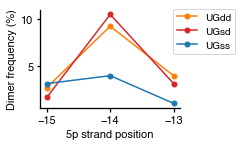

In [44]:
xs = [-15,-14,-13]
ys1 = ugtbl.loc['DD'].tolist()
ys2 = ugtbl.loc['SD'].tolist()
ys3 = ugtbl.loc['SS'].tolist()

fig, ax = plt.subplots(1, 1, figsize=(2.5,1.8))
ax.errorbar(xs,ys1,ms=5,marker='o',label='UGdd',color='tab:orange')
ax.errorbar(xs,ys2,ms=5,marker='o',label='UGsd',color='tab:red')
ax.errorbar(xs,ys3,ms=5,marker='o',label='UGss',color='tab:blue')
ax.set_ylabel('Dimer frequency (%)')
ax.set_xlabel('5p strand position')
ax.legend(loc=(.95,.55))
fig.savefig('230717_ug_freq.pdf')

### 5D. In vitro processing results of pri-miRNAs with the UG motif in different structures.

In [45]:
msl = [[m for m in ugmirs if ugmirs[m]=='DD'],
       [m for m in ugmirs if ugmirs[m]=='SD'],
       [m for m in ugmirs if ugmirs[m]=='SS'],
       [m for m in folded if m not in ugmirs]]

pes = [[releffs[m] for m in ms] for ms in msl]
phs = [[relhoms[m] for m in ms] for ms in msl]
xs = np.arange(len(msl))
ys1 = map(np.average,pes)
es1 = map(sem,pes)
ys2 = map(np.average,phs)
es2 = map(sem,phs)
labels = ['UGdd','UGsd','UGss','No UG']
for x,pe,ph in zip(labels,pes,phs):
    print '%s %.4f %.4f'%(x,mannwhitneyu(pes[3],pe)[1]*2,mannwhitneyu(phs[3],ph)[1]*2)
labels = ['%s\n(%s)'%(l,len(pe)) for l,pe in zip(labels,pes)]

UGdd 0.2031 0.0300
UGsd 0.0014 0.0037
UGss 1.0000 0.8053
No UG 0.9999 0.9999


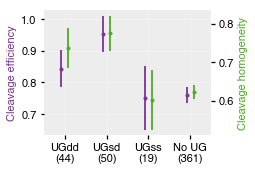

In [46]:
fig,ax = plt.subplots(1,1,figsize=(3,2.3))

ax.errorbar(xs-.08,ys1,yerr=es1,lw=0,elinewidth=1.8,ms=3,marker='o',color='#7b3294')
axt = ax.twinx()
axt.errorbar(xs+.08,ys2,yerr=es2,lw=0,elinewidth=1.8,ms=3,marker='o',color='#4dac26')
ax.set_xlim(min(xs)-.5,max(xs)+.5)
ax.set_xticks(xs)
ax.set_xticklabels(labels)
ax.grid(ls='-',lw=.5,color='w')
for a in [ax,axt]:
    a.spines['left'].set_visible(False)
    a.spines['bottom'].set_visible(False)

ax.tick_params(left='on')
axt.tick_params(left='off',right='on')
ax.set_facecolor('#ededed')
ax.set_ylabel('Cleavage efficiency',color='#7b3294')
axt.set_ylabel('Cleavage homogeneity',color='#4dac26')
fig.savefig('221021_f5d__ug_processing.pdf')

### 5E. In vitro processing results of artificial pri-miRNAs with the UG motif in different structures.

In [48]:
dicttbl = pd.read_csv('publication/Kwon2019/var_processing.csv',index_col=0)
dicttbl.head(1)

,template,ghg,bj5,bj3,aj5,aj3,bj str,aj str,UG1,UG2,UG3,UGU1,UGU2,UGU3,UG,UGU,input,cleaved,eff
AAACTATGATGAAGGGTGTGTCGGATTATGC,crick,TTT,GG,CC,TTT,ACA,DD,DSS,1,0,0,0,0,0,1,0,1425,618,0.433684


In [50]:
dictnorm = pd.DataFrame()
for templ,grp in dicttbl.groupby(['template']):
    tmp = grp.copy()
    tmp['norm eff'] = (tmp['eff']-np.average(tmp['eff']))/np.std(tmp['eff'])
    dictnorm = dictnorm.append(tmp)

In [51]:
ddug = dictnorm[(dictnorm['bj str']=='DD')&(dictnorm['UG2']==1)]['norm eff']
ddct = dictnorm[(dictnorm['bj str']=='DD')&(dictnorm['UG2']==0)]['norm eff']
print len(ddug), len(ddct)

sdug = dictnorm[(dictnorm['bj str']=='SD')&(dictnorm['UG2']==1)]['norm eff']
sdct = dictnorm[(dictnorm['bj str']=='SD')&(dictnorm['UG2']==0)]['norm eff']
print len(sdug), len(sdct)

ssug = dictnorm[(dictnorm['bj str']=='SS')&(dictnorm['UG2']==1)]['norm eff']
ssct = dictnorm[(dictnorm['bj str']=='SS')&(dictnorm['UG2']==0)]['norm eff']
print len(ssug), len(ssct)

for ml,mlct in [(ddug,ddct),(sdug,sdct),(ssug,ssct)]:
    print mannwhitneyu(ml,mlct)[1]
    print map(np.average,[ml,mlct])

666 2237
737 4970
769 10670
1.5374573982987475e-34
[0.0901337169956317, -0.4021435734626037]
9.331372763556098e-19
[1.0410055283533948, 0.4876195658969102]
0.010524108364526923
[0.0490760552385903, -0.08027866601229798]


3.074914796597495e-34
1.8662745527112196e-18
0.021048216729053847


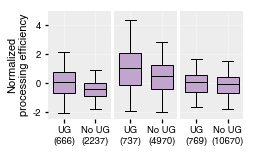

In [53]:
fig = plt.figure(figsize=(3.5,2))
gs = gridspec.GridSpec(1, 3, width_ratios=(1,1,1))
axes = [fig.add_subplot(gs[i]) for i in range(3)]
for ax,ml,mlct in zip(axes,[ddug,sdug,ssug],[ddct,sdct,ssct]):
    xs = np.arange(2)
    #ys1 = map(np.average,[ml,mlct])
    #es1 = map(sem,[ml,mlct])
    print mannwhitneyu(ml,mlct)[1]*2
    bp = ax.boxplot([ml,mlct],positions=xs,widths=.7,sym='',whis=1,
              medianprops={'linewidth':0},meanprops={'color':'k','linestyle':'-'},
              showmeans=True,meanline=True,patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('#c2a5cf')
    ax.set_xlim(min(xs)-.5,max(xs)+.5)
    ax.set_ylim(-2.5,5)
    ax.set_xticks(xs)
    ax.set_xticklabels(['UG\n(%s)'%len(ml),'No UG\n(%s)'%len(mlct)])
    ax.set_yticklabels([]); axt.set_yticklabels([])
    ax.tick_params(left='off',labelsize=9.4)
    ax.spines['left'].set_visible(False); ax.spines['bottom'].set_visible(False)
    ax.set_facecolor('#ededed')
    ax.grid(ls='-',lw=.7,color='w')
    
axes[0].set_yticks([-2,0,2,4]); axes[0].set_yticklabels([-2,0,2,4])
axes[0].tick_params(left='on')
axes[0].set_ylabel('Normalized\nprocessing efficiency')
fig.subplots_adjust(wspace=.05)
#fig.savefig(resultpath + '220530_f5e__ug_processing_variant.pdf')